In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.linalg import eigsh
from scipy.sparse.csgraph import laplacian
import networkx as nx
from sklearn.cluster import SpectralClustering, KMeans

Text(0.5, 1.0, 'Original 2D points')

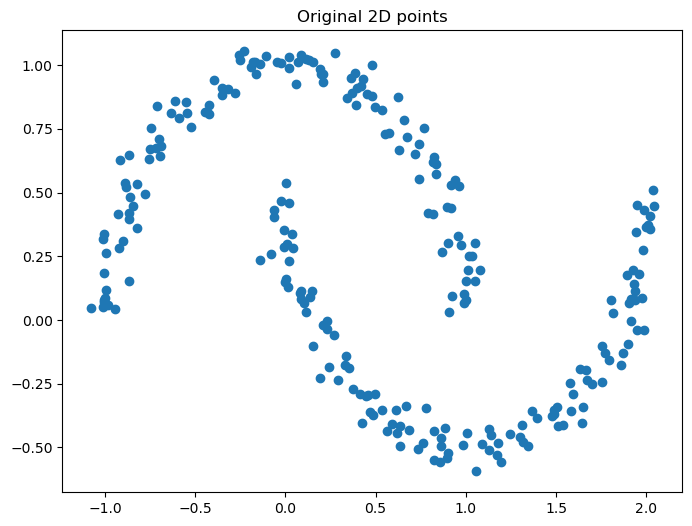

In [3]:
# 1. Simulate data points in 2D space with a nonconvex clustering structure (two interlocking moons)
n_samples = 250
X, y = make_moons(n_samples=n_samples, noise=0.05, random_state=42)

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Original 2D points")


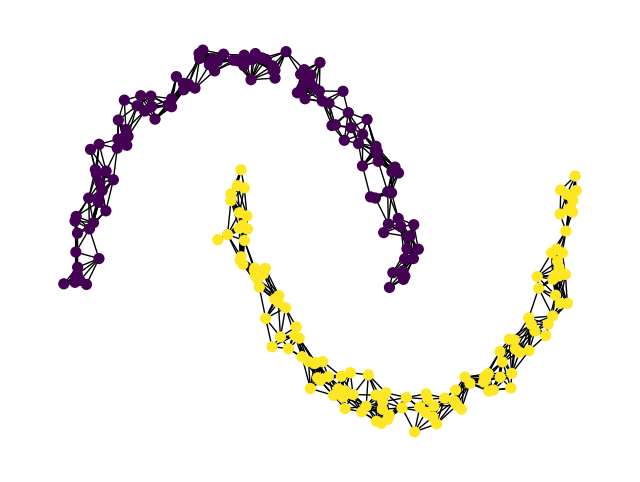

In [4]:
# 2. Construct the epsilon-neighborhood graph of those points
# two points are adjacent if these are within epsilon distance of each other
epsilon = 0.15
dist_matrix = squareform(pdist(X))
adjacency_matrix = (dist_matrix < epsilon).astype(int) - np.eye(n_samples)

# Create a NetworkX graph from the adjacency matrix
G = nx.from_numpy_array(adjacency_matrix)

# 3. Visualize the graph
fig, ax = plt.subplots(figsize=(8, 6))
pos = {i: X[i] for i in range(n_samples)}
nx.draw(G, pos, node_color=y, node_size=50, cmap='viridis', ax=ax, with_labels=False)

plt.show()

In [6]:
# 3. Form the Laplacian matrix of that graph
laplacian_matrix = laplacian(adjacency_matrix, normed=False)

# 4. Perform an Eigendecomposition of the Laplacian matrix and get the
# eigenvectors corresponding to the four smallest eigenvalues
n_eigenvectors = 4
eigenvalues, eigenvectors = eigsh(laplacian_matrix, k=n_eigenvectors, which='SM')

Note that two eigenvalues are zero (to machine tolerance) -- this corresponds to two connected components of the graph.

In [7]:
print(eigenvalues)

[-9.02451042e-17  6.31908157e-16  1.91487479e-02  2.64640612e-02]


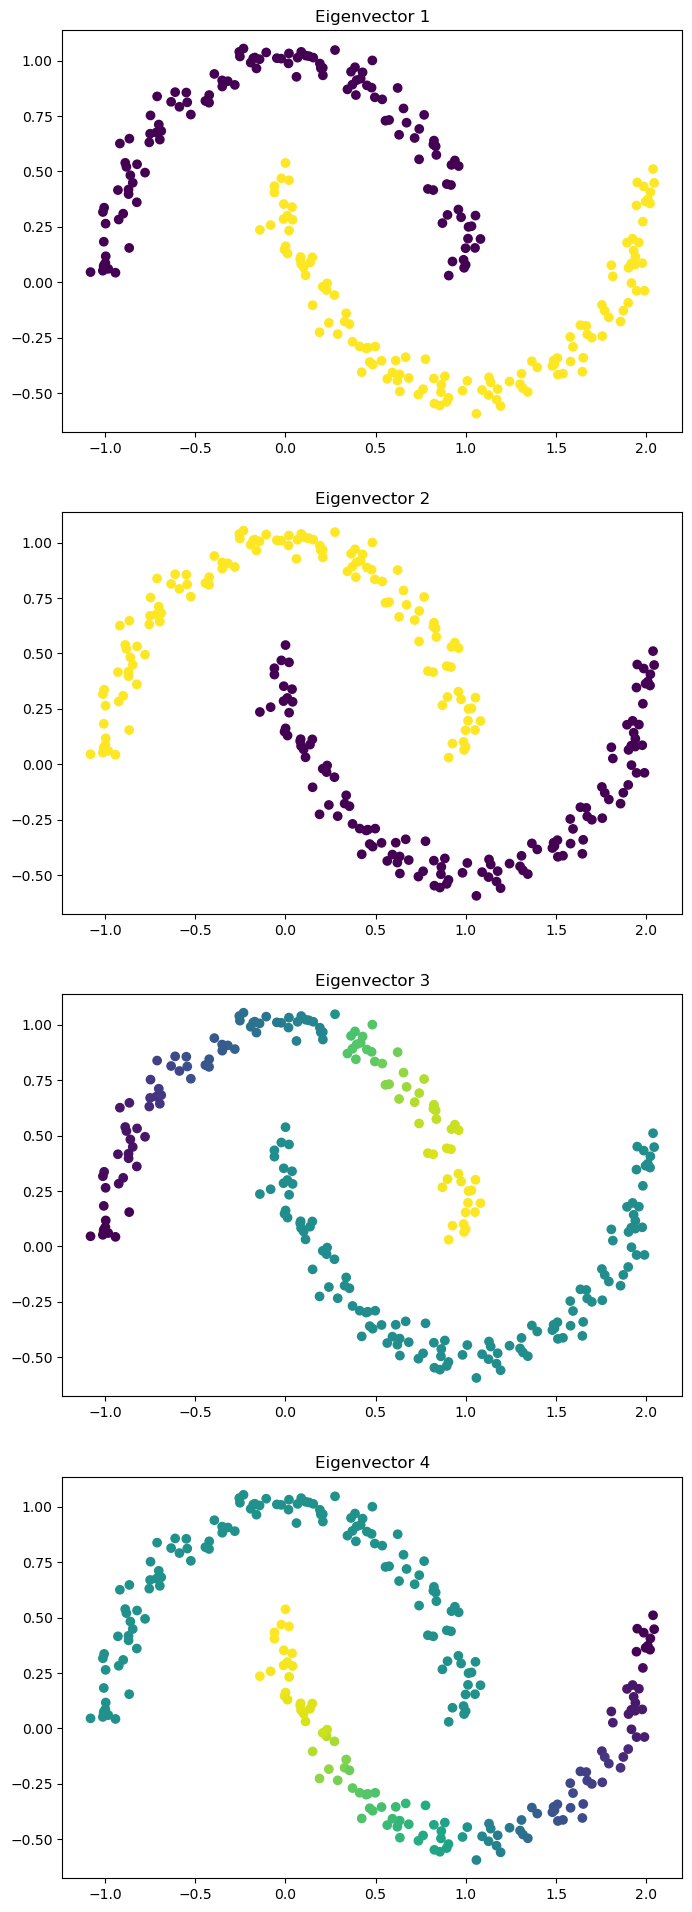

In [8]:
# Visualize the original points colored in based on the eigenvectors
fig, axes = plt.subplots(n_eigenvectors, 1, figsize=(8, 24))

for i in range(n_eigenvectors):
    axes[i].scatter(X[:, 0], X[:, 1], c=eigenvectors[:, i], cmap='viridis')
    axes[i].set_title(f"Eigenvector {i + 1}")

plt.show()


/Users/scottjg2/Sites/ECO395M/notebooks/env/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/scottjg2/Sites/ECO395M/notebooks/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


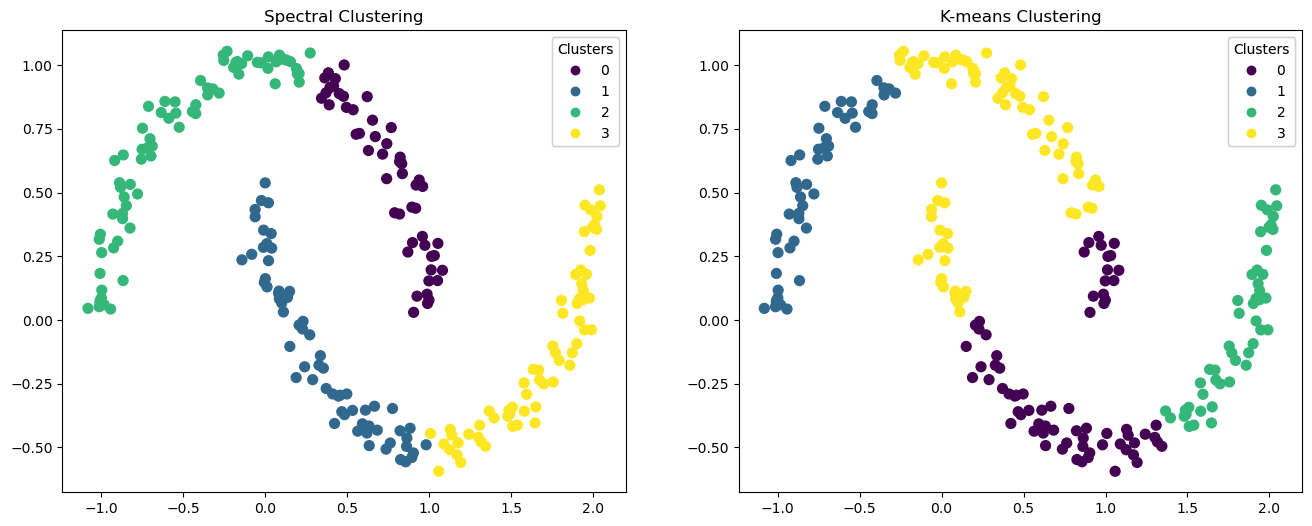

In [13]:
# Apply SpectralClustering
n_clusters = 4
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', n_neighbors=10, random_state=42)
spectral_labels = spectral_clustering.fit_predict(X)

# Compare with KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Spectral Clustering
scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=spectral_labels, cmap='viridis', marker='o', s=50)
legend1 = axes[0].legend(*scatter1.legend_elements(), title="Clusters")
axes[0].add_artist(legend1)
axes[0].set_title("Spectral Clustering")

# K-means Clustering
scatter2 = axes[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', marker='o', s=50)
legend2 = axes[1].legend(*scatter2.legend_elements(), title="Clusters")
axes[1].add_artist(legend2)
axes[1].set_title("K-means Clustering")

plt.show()